In [1]:
import numpy as np
from PIL import Image

In [2]:
!curl https://www.talkwalker.com/images/2020/blog-headers/image-analysis.png > image.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  671k  100  671k    0     0  1392k      0 --:--:-- --:--:-- --:--:-- 1392k


In [3]:
def encode(src, message, dest, stop_word="$t3g0"):
    img = Image.open(src, 'r')
    width, height = img.size
    array = np.array(list(img.getdata()))

    if img.mode == 'RGB':
        n = 3
        m = 0
    elif img.mode == 'RGBA':
        n = 4
        m = 1

    total_pixels = array.size // n

    message += stop_word
    b_message = ''.join([format(ord(i), "08b") for i in message])
    req_pixels = len(b_message)

    if req_pixels > total_pixels:
        print("ERRO: precisa de um arquivo maior")

    else:
        index=0
        for p in range(total_pixels):
            for q in range(m, n):
                if index < req_pixels:
                    array[p][q] = int(format(array[p][q], "08b")[:-1] + b_message[index], 2)
                    index += 1
    
    array = array.reshape(height, width, n)
    enc_img = Image.fromarray(array.astype('uint8'), img.mode)
    enc_img.save(dest)
    print("Imagem Codificada com Sucesso")

def decode(src, stop_word="$t3g0"):
    img = Image.open(src, 'r')
    array = np.array(list(img.getdata()))

    if img.mode == 'RGB':
        n = 3
        m = 0
    elif img.mode == 'RGBA':
        n = 4
        m = 1

    total_pixels = array.size // n

    hidden_bits = ""
    for p in range(total_pixels):
        for q in range(m, n):
            hidden_bits += (bin(array[p][q])[-1]) #(bin(array[p][q])[2:][-1])

    hidden_bits = [hidden_bits[i:i+8] for i in range(0, len(hidden_bits), 8)]

    message = ""
    for i in range(len(hidden_bits)):
        if message[-5:] == stop_word:
            break
        else:
            message += chr(int(hidden_bits[i], 2))
    
    if stop_word in message:
        print("Mensagem Oculta:", message[:-5])
    else:
        print("Nenhuma mensagem oculta foi encontrada")

In [4]:
image_path = 'image.png'
image_encoded_path = 'image-encoded.png'
message = "Existe uma mensagem secreta, você consegue ler???"

encode(image_path, message, image_encoded_path)

Imagem Codificada com Sucesso


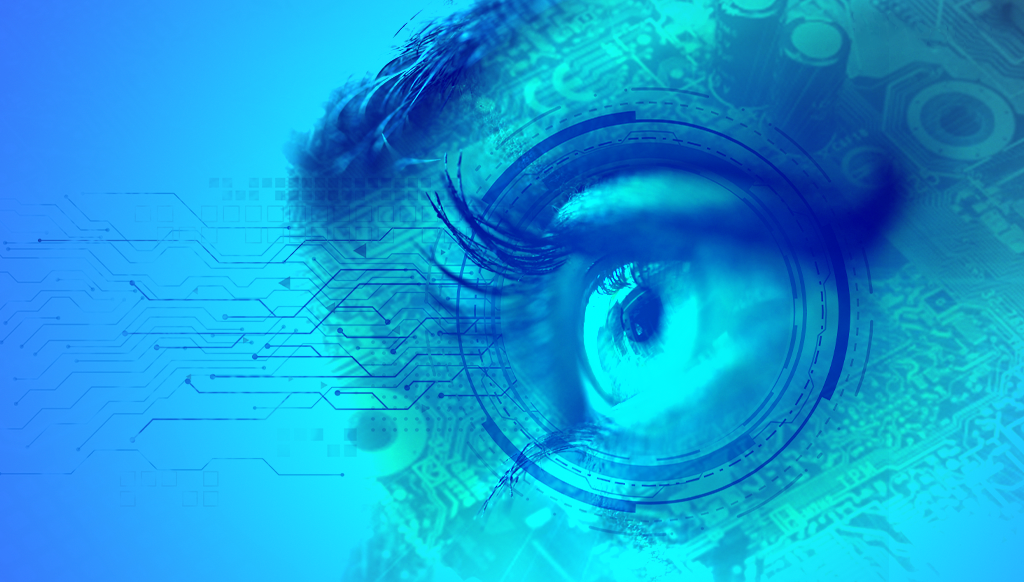

In [5]:
Image.open(image_path, 'r')

In [6]:
decode(image_encoded_path)

Mensagem Oculta: Existe uma mensagem secreta, você consegue ler???


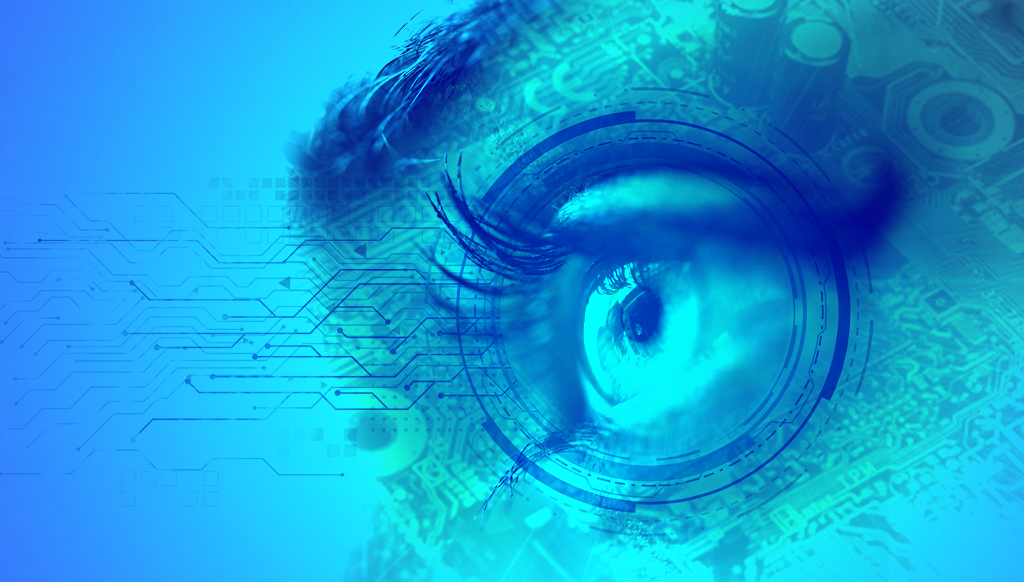

In [7]:
Image.open(image_encoded_path, 'r')

In [8]:
def openImg(src):
    img = Image.open(src, 'r')
    array = np.array(list(img.getdata()))

    return array

In [9]:
openImg(image_path)

array([[ 55, 118, 252],
       [ 55, 118, 251],
       [ 55, 118, 251],
       ...,
       [ 40, 182, 255],
       [ 38, 182, 255],
       [ 38, 181, 250]])

In [10]:
openImg(image_encoded_path)

array([[ 54, 119, 252],
       [ 54, 118, 251],
       [ 54, 119, 250],
       ...,
       [ 40, 182, 255],
       [ 38, 182, 255],
       [ 38, 181, 250]])